# **Kanker Pankreas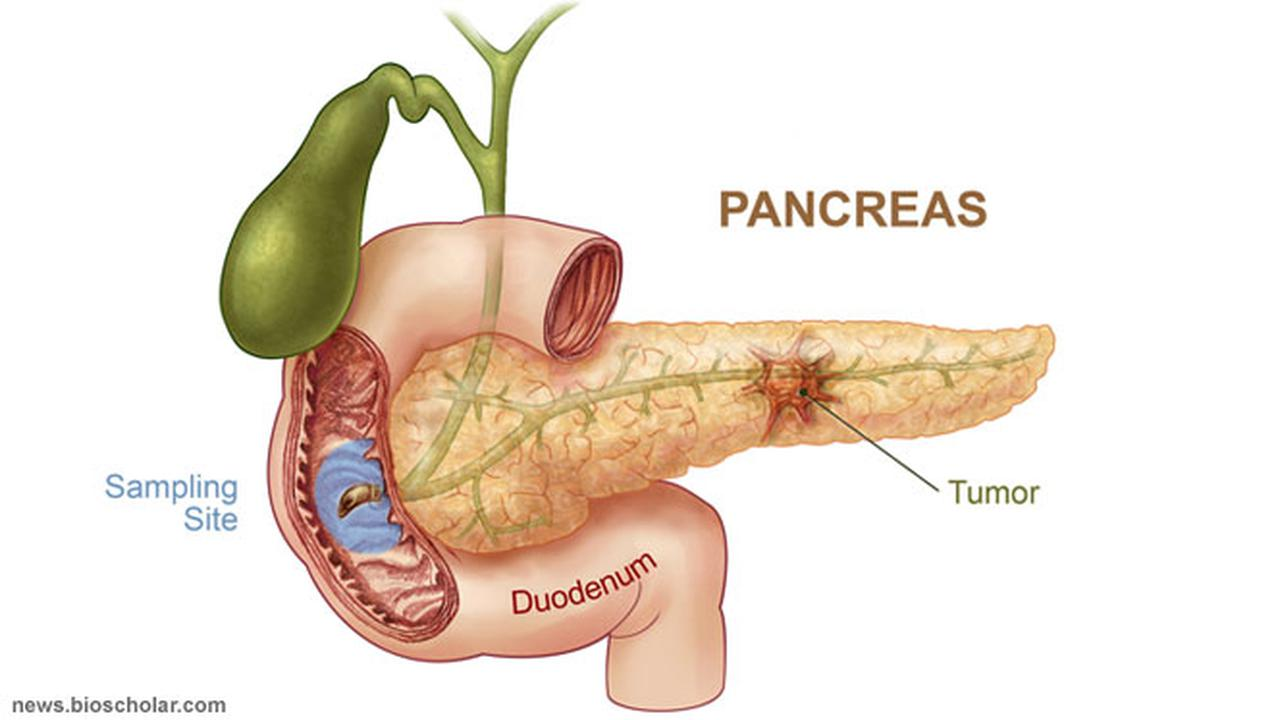**

# Definitions

Kanker pankreas adalah kanker yang tumbuh di jaringan pankreas. Kanker pankreas dapat dialami oleh siapa saja, tetapi lebih sering terjadi pada orang yang berusia di atas 55 tahun. Kanker pankreas terjadi ketika sel-sel di pankreas tumbuh dengan tidak normal dan tidak terkendali. Stadium awal dari kanker ini sering kali tidak bergejala. Biasanya, gejala baru muncul ketika kanker telah menyebar ke organ tubuh yang lain.

Sumber : (https://www.alodokter.com/kanker-pankreas)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [36]:
pankreas = pd.read_csv('/content/cancer pankreas.csv')
pankreas.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [37]:
df = pankreas.drop(columns=['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis']) #fungsi drop untuk membuang variabel
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [49]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
    
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {pankreas}', fontsize=15)
    plt.show()
    
    
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

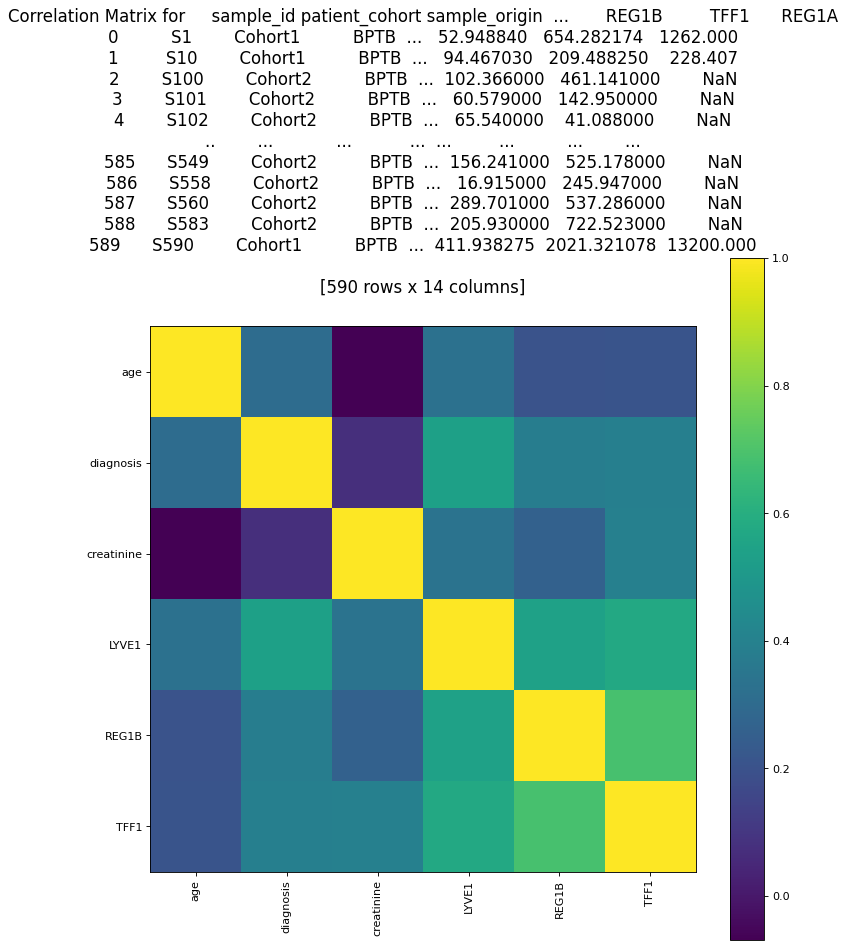

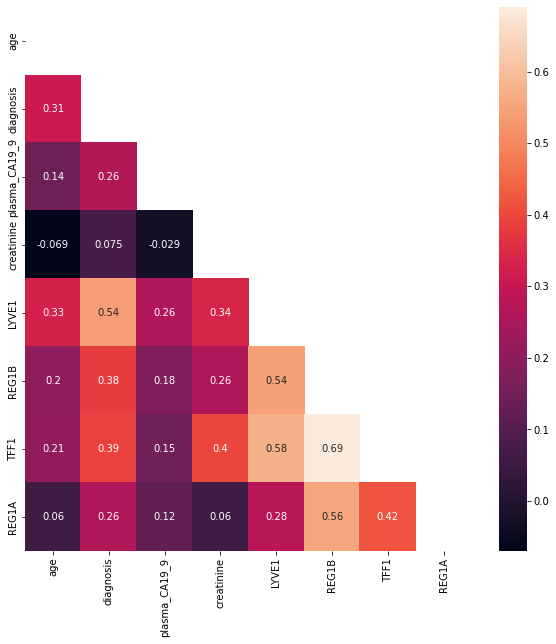

In [42]:
for i in df[2:]:
    if i==3:
        i=1
    else:
        i=0
plotCorrelationMatrix(df, 11)

corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

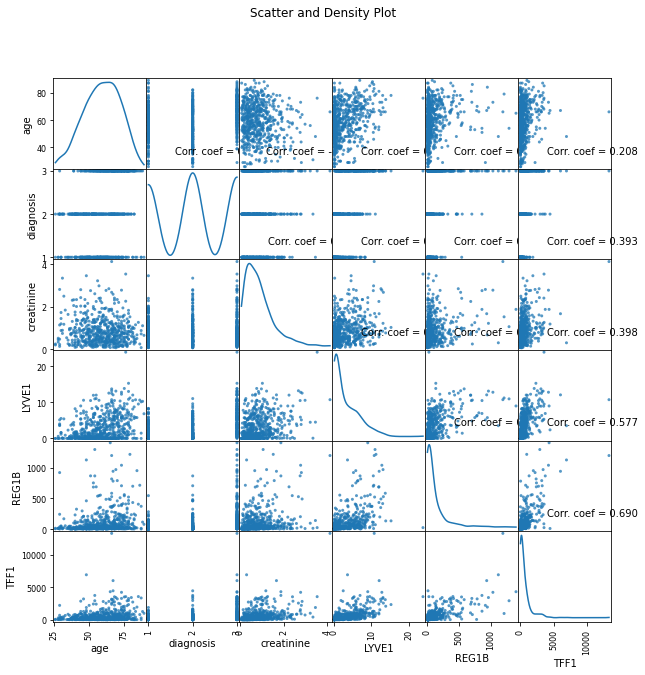

In [43]:
plotScatterMatrix(df, 10, 10)

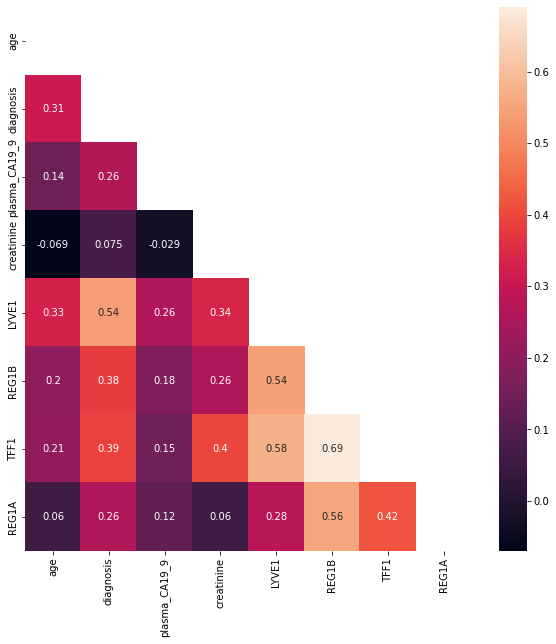

In [50]:
corr = df.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

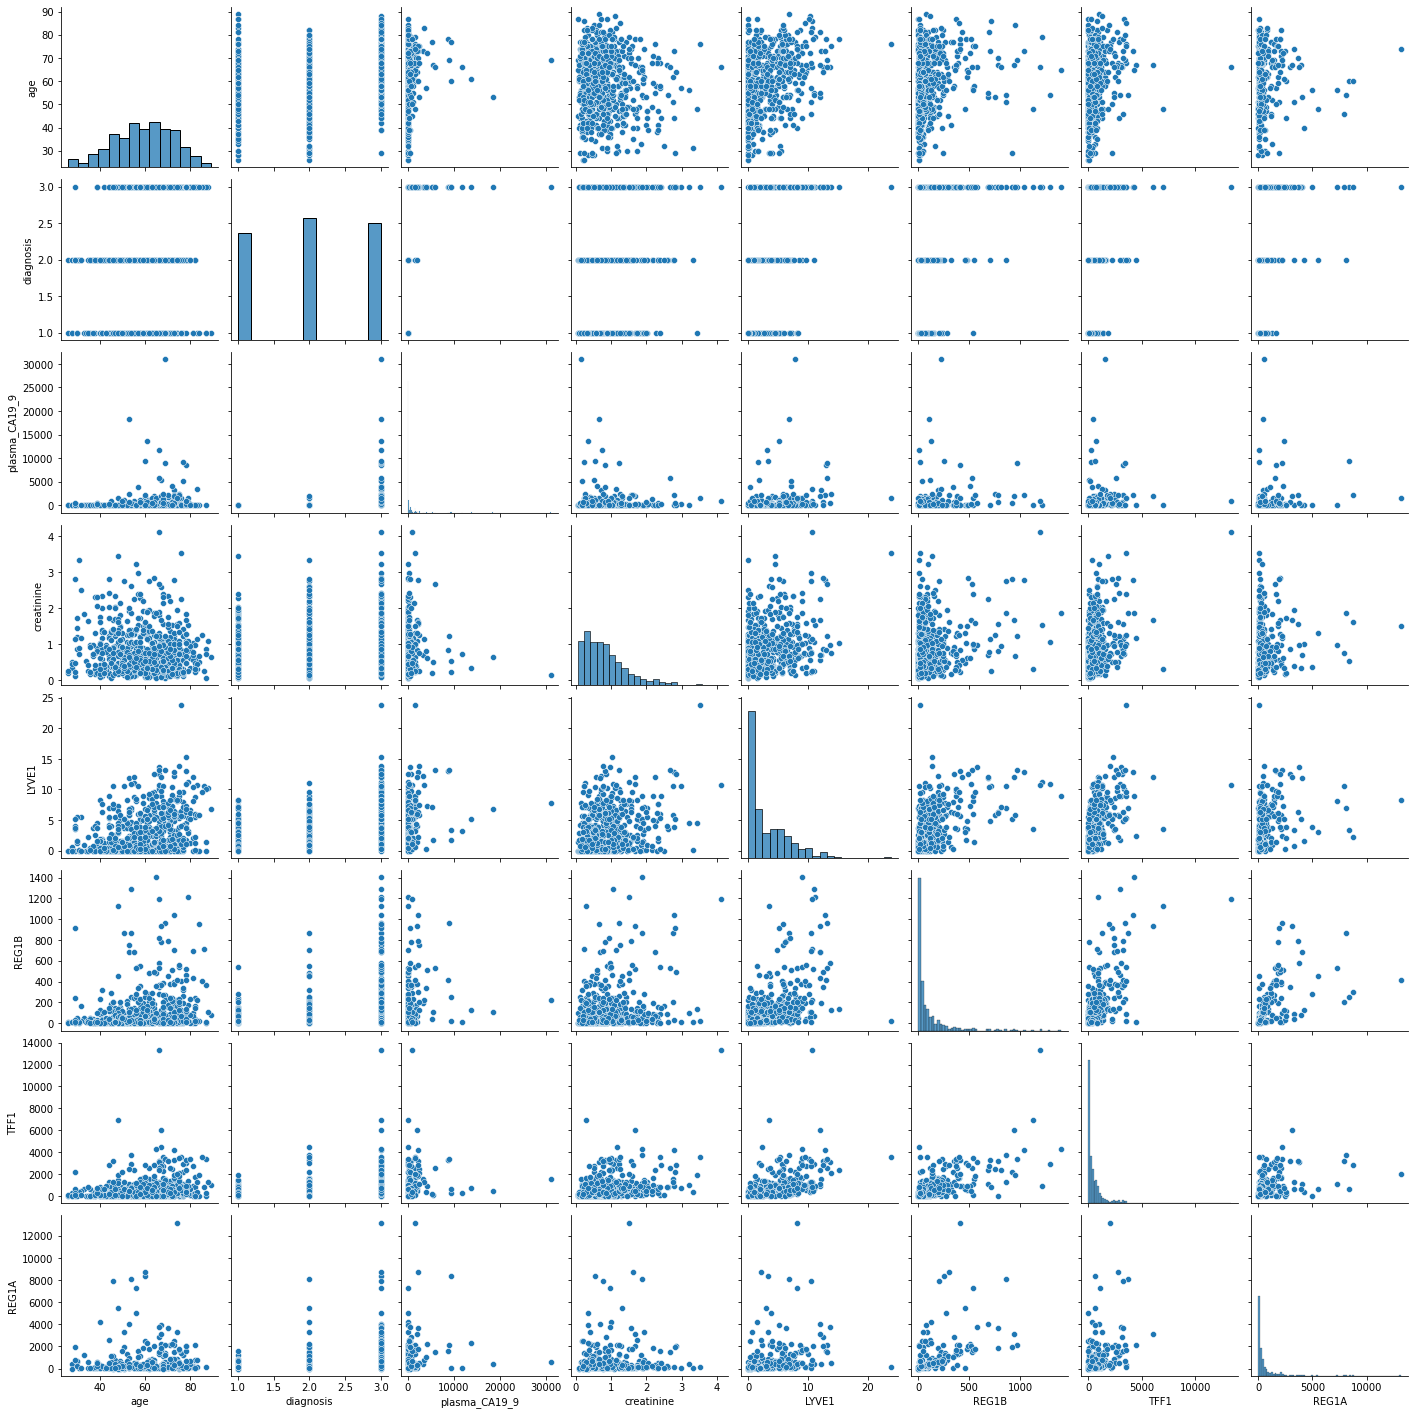

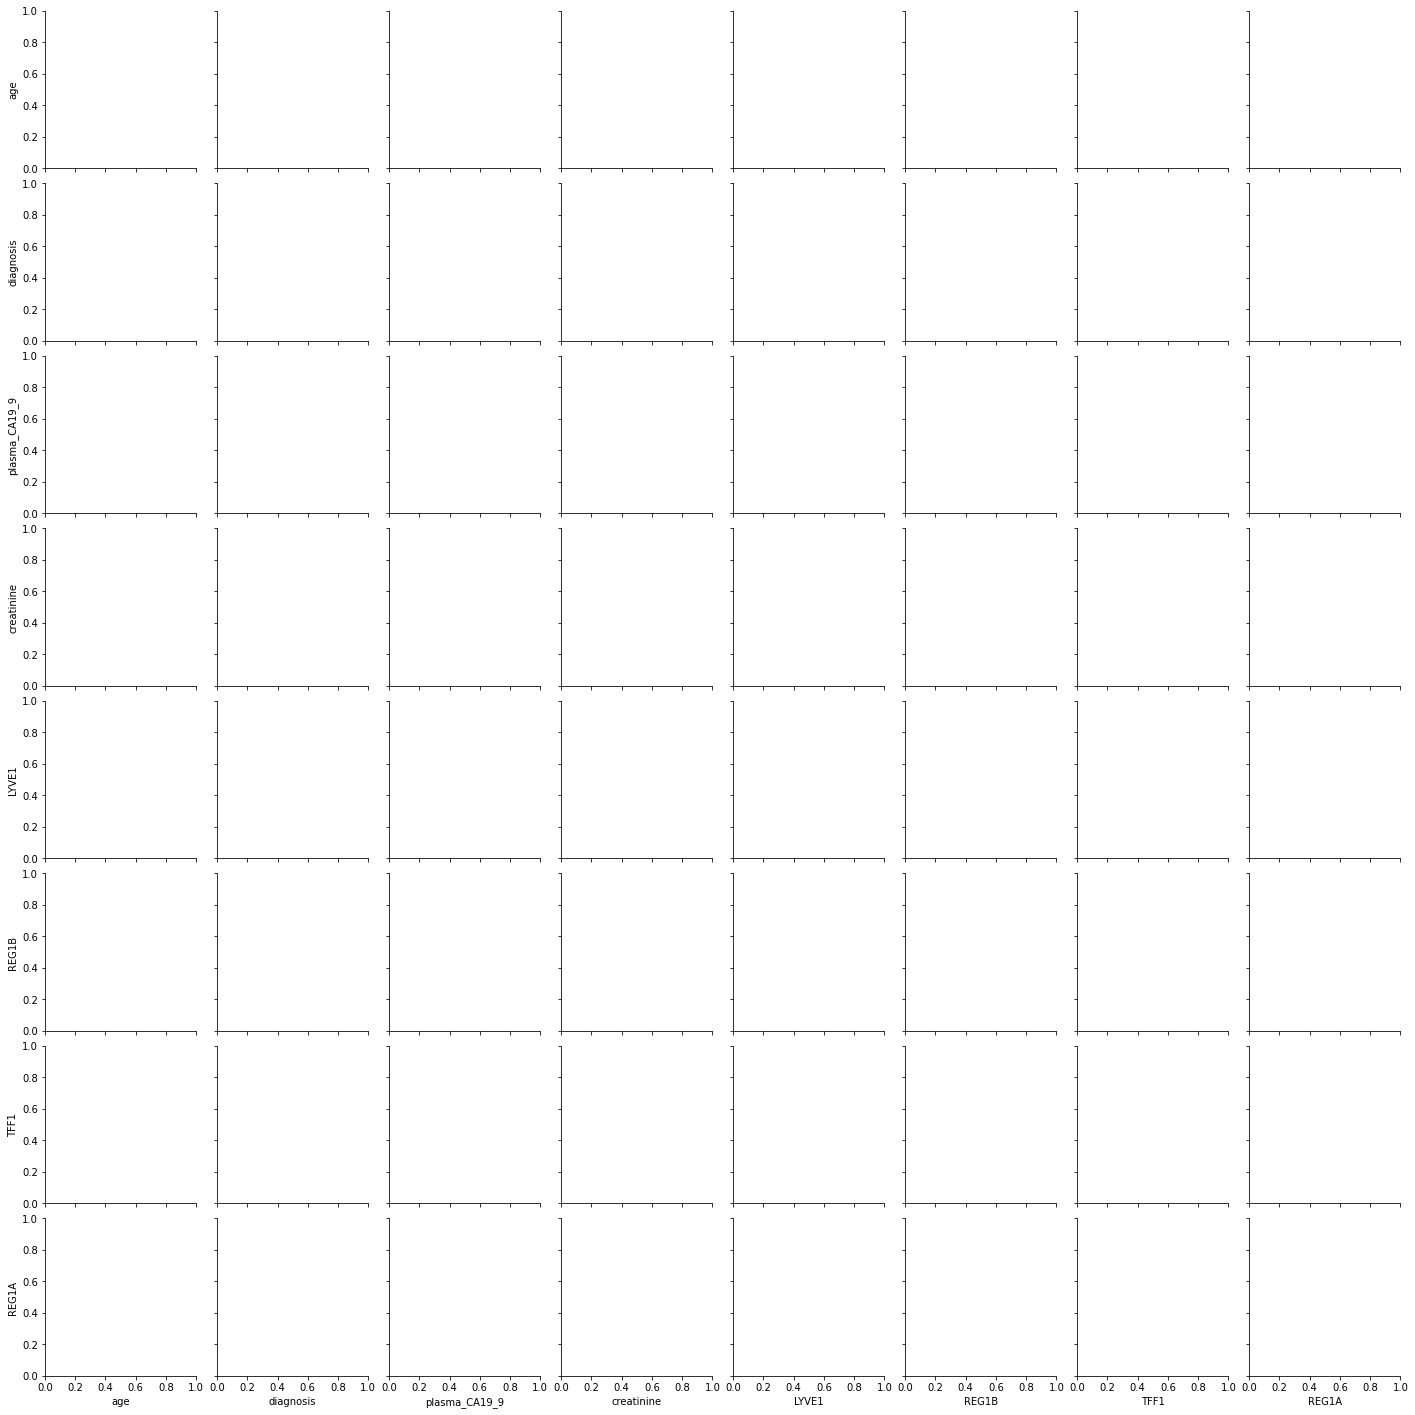

In [52]:
sns.pairplot(df)
sns.PairGrid(df)